<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from fbprophet import Prophet

In [2]:
data = pd.read_csv('us-counties-covid.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
wa = data[data['state'] == 'Washington']
wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 12315
Data columns (total 6 columns):
date      480 non-null object
county    480 non-null object
state     480 non-null object
fips      480 non-null float64
cases     480 non-null int64
deaths    480 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.2+ KB


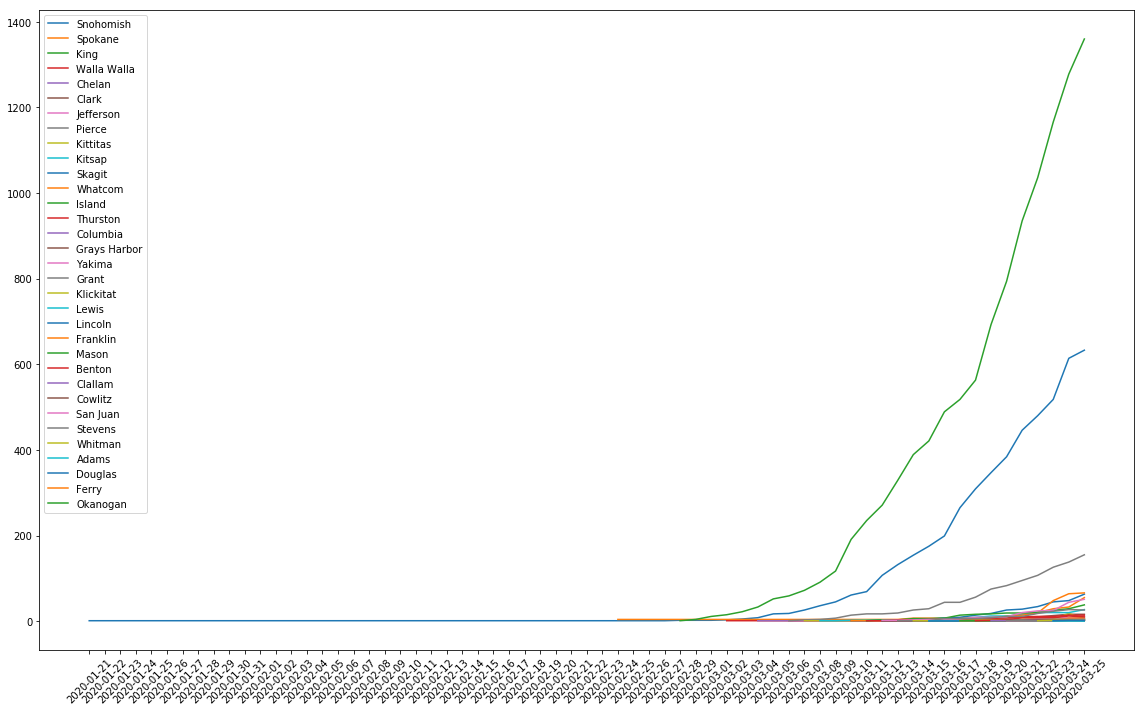

In [15]:
plt.figure(figsize=(16,10))
for county in wa.county.unique():
    co = wa[wa['county'] == county]
    plt.plot(co.date, co.cases, label=county)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout();

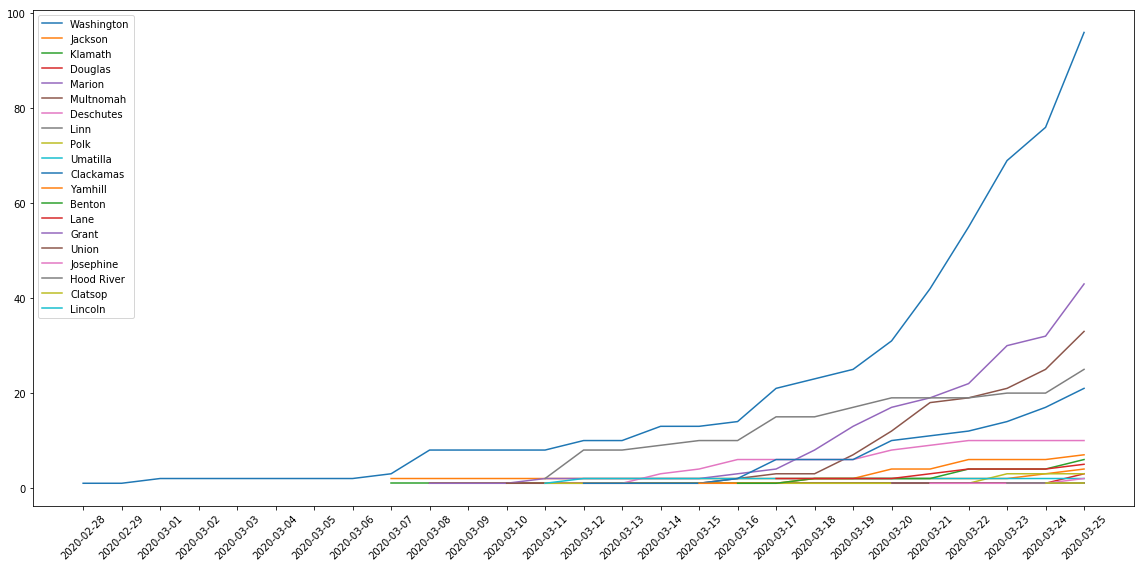

In [14]:
ore = data[data['state'] == 'Oregon']

plt.figure(figsize=(16,8))
for county in ore.county.unique():
    co = ore[ore['county'] == county]
    plt.plot(co.date, co.cases, label=county)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout();

In [16]:
states = pd.read_csv('us-states-covid.csv')
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [23]:
wa_state = states[states['state'] == 'Washington'].loc[:, ['date', 'cases']]
wa_state.columns = ['ds', 'y']
wa_state.head()

,ds,y
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
4,2020-01-24,1
7,2020-01-25,1


In [37]:
def proph_it(data, interval=0.95, forecast_periods1=90, 
             forecast_periods2=180):
    '''Uses Facebook Prophet to fit model to train set, evaluate performance
       with test set, and forecast with whole dataset. The model has a 95%
       confidence interval by default.
       
       Remember: datasets need to have two columns, `ds` and `y`.
       Dependencies: fbprophet
       Parameters:
          train: training data
          test: testing/validation data
          whole: all available data for forecasting
          interval: confidence interval (percent)
          forecast_periods1: number of months for forecast on training data
          forecast_periods2: number of months for forecast on whole dataset'''
    
    # Fit model to training data and forecast
    model = Prophet(interval_width=interval)
    model.fit(data)
    future = model.make_future_dataframe(periods=forecast_periods1, freq='D')
    forecast = model.predict(future)
    
    # Plot the model and forecast
    model.plot(forecast, uncertainty=True)
    plt.title('{}-day forecast'.format(forecast_periods1))
    plt.legend();
    
    # Make a longer forecast
    model2 = Prophet(interval_width=interval)
    model2.fit(data)
    future2 = model2.make_future_dataframe(periods=forecast_periods2, 
                                          freq='D')
    forecast2 = model2.predict(future2)
    
    # Plot the model and forecast
    model2.plot(forecast2, uncertainty=True)
    plt.title('{}-day forecast'.format(forecast_periods2))
    plt.legend();
    
    # Plot the model components
    model2.plot_components(forecast);
    

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


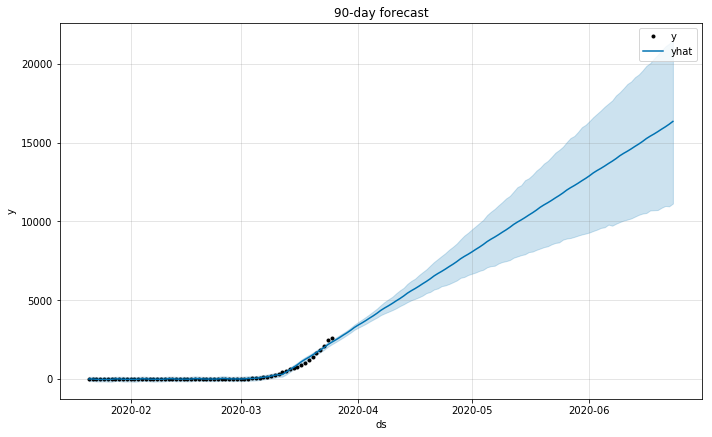

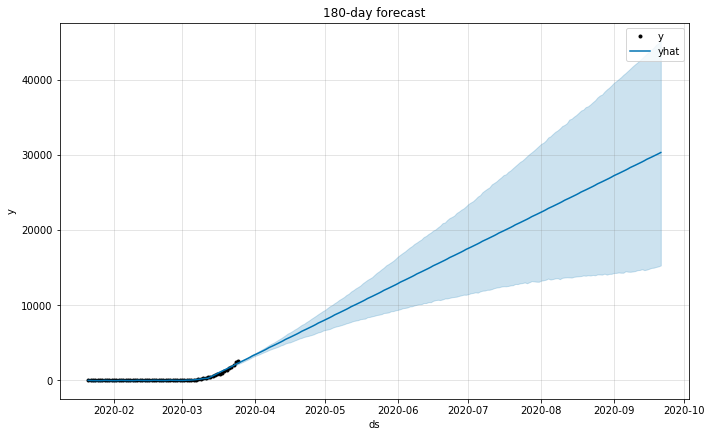

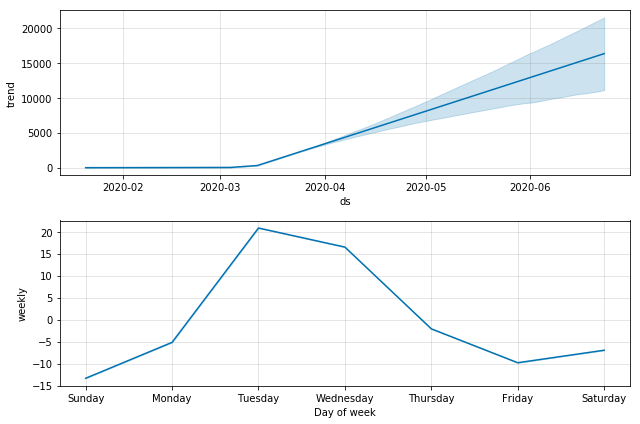

In [38]:
proph_it(wa_state)

In [27]:
or_state = states[states['state'] == 'Oregon'].loc[:, ['date', 'cases']]
or_state.columns = ['ds', 'y']
or_state.head()

,ds,y
225,2020-02-28,1
235,2020-02-29,1
247,2020-03-01,2
262,2020-03-02,2
278,2020-03-03,2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.
/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


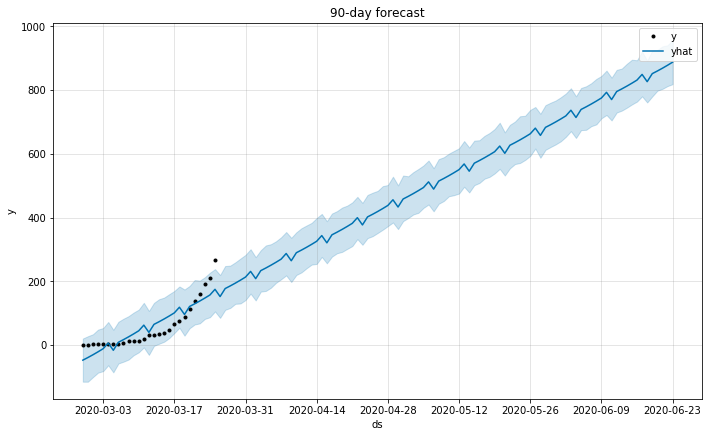

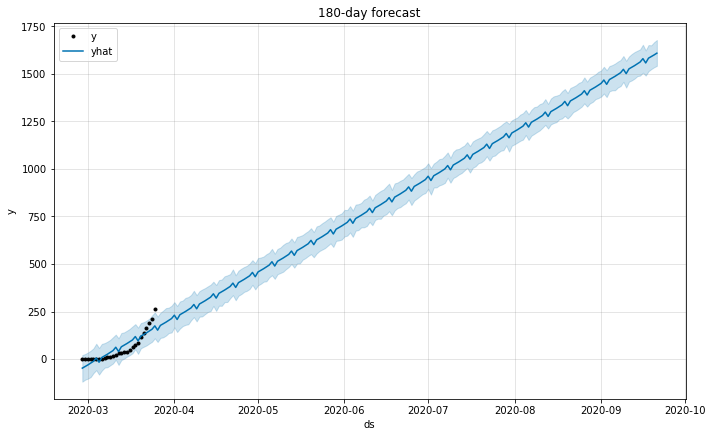

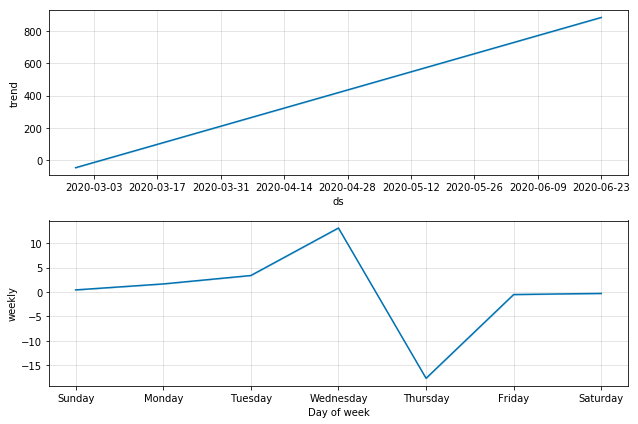

In [39]:
proph_it(or_state)